# Plotting and Exploration

In [1]:
%run analysis.py

To plot, execute the following:
from matplotlib import pyplot as mplt
from pandas.tools.plotting import parallel_coordinates
from scipy import stats

import seaborn as sns
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_context('notebook')


In [2]:
from matplotlib import pyplot as mplt
from scipy import stats

import seaborn as sns
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_context('notebook')

In [3]:
combined_df = pd.read_csv(combined_f)
combined_df.head()

,boardID,algo,heur,size,expanded,branching,time,cost
0,1.txt,astar,disjointPDBHorizontal,3x3,1,2.00,4893,1
1,2.txt,astar,disjointPDBHorizontal,3x3,1,2.00,4814,1
2,3.txt,astar,disjointPDBHorizontal,3x3,2,1.19,4723,2
3,4.txt,astar,disjointPDBHorizontal,3x3,2,0.79,4770,2
4,5.txt,astar,disjointPDBHorizontal,3x3,0,0.00,3,0


---

*Plotting functions below.*

In [4]:
def dist_plots_vert(data, idx_attr, val_attr):
    val_ordering = data[idx_attr].value_counts().index
    g = sns.FacetGrid(data, row=idx_attr, row_order=val_ordering,
                      size=1.7, aspect=4)
    g.map(sns.distplot, val_attr, rug=True) #hist=False, rug=True
    
    return mplt.show()

def factor_plots_scatter(data, row_attr, col_attr, x_attr, y_attr, **kwargs):
    g_factor = sns.FacetGrid(data, row=row_attr, col=col_attr, margin_titles=True)
    g_factor.map(sns.regplot, x_attr, y_attr, color=".3", fit_reg=False, x_jitter=.1, **kwargs)
    
    for ax in g_factor.axes.flat:
        [i.set_alpha(.75) for i in ax.collections]
        [i.set_alpha(.75) for i in ax.lines]
    
    return mplt.show()

def factor_plots_scatter_c(data, row_attr, col_attr, x_attr, y_attr, c, **kwargs):
    g_factor = sns.FacetGrid(data, row=row_attr, col=col_attr, margin_titles=True)
    g_factor.map(sns.regplot, x_attr, y_attr, fit_reg=False, x_jitter=.1, scatter_kws={'c':data[c]}, **kwargs)
    
    for ax in g_factor.axes.flat:
        [i.set_alpha(.75) for i in ax.collections]
        [i.set_alpha(.75) for i in ax.lines]
    
    return mplt.show()

def plot_pair_grid(data, color_attr, **kwargs):
    
    g_pair = sns.PairGrid(data, hue=color_attr, vars=metrics)
    g_pair = g_pair.map_diag(mplt.hist)
    g_pair = g_pair.map_offdiag(mplt.scatter, **kwargs)
    g_pair.add_legend()
    
    for ax in g_pair.axes.flat:
        [i.set_alpha(.25) for i in ax.collections]
        [i.set_alpha(.25) for i in ax.lines]
        
    # 
    g_pair.axes.set_title("Title",fontsize=50)
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=5)
    
    sns.despine()
    return mplt.show()

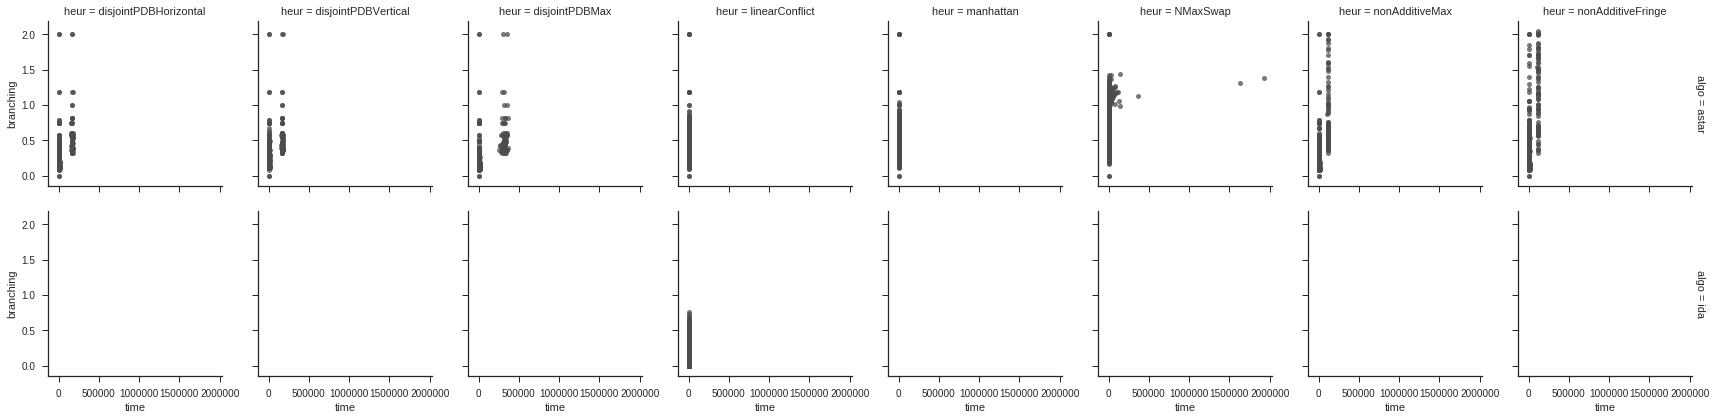

In [5]:
factor_plots_scatter(combined_df, 'algo', 'heur', 'time', 'branching', scatter_kws={"s": 25})

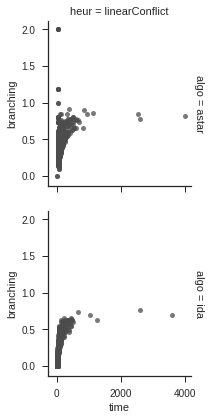

In [15]:
factor_plots_scatter(combined_df[combined_df.heur == 'linearConflict'], 'algo', 'heur', 'time', 'branching', scatter_kws={"s": 25})

#### Overviews

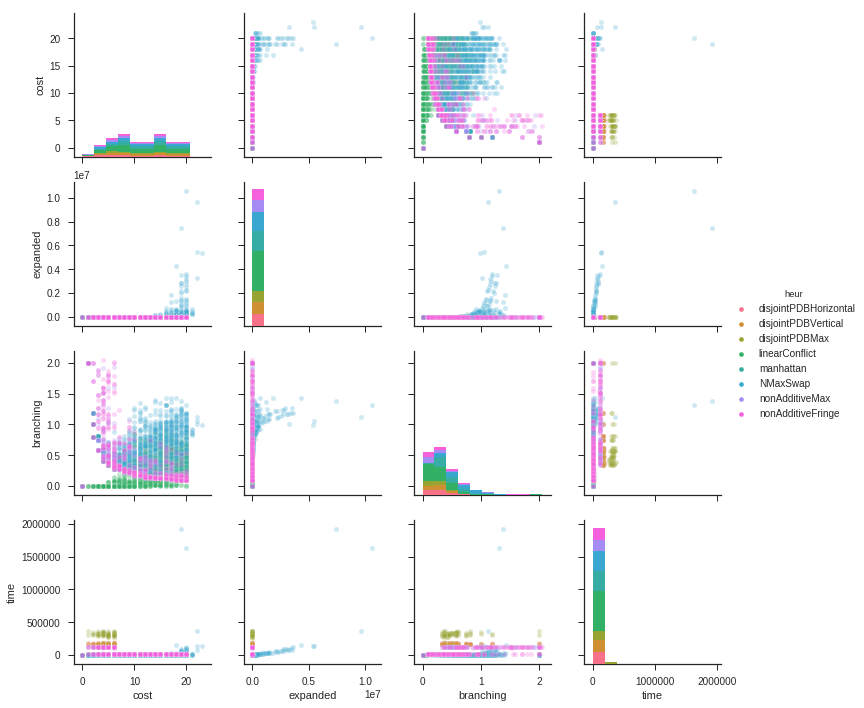

In [16]:
plot_pair_grid(combined_df, 'heur', edgecolor="w", s=25)

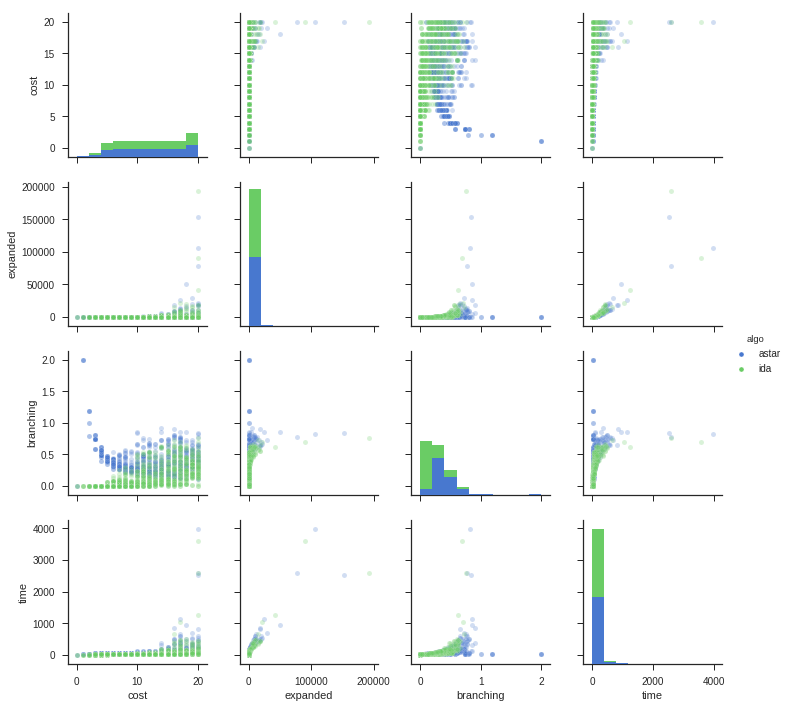

In [22]:
plot_pair_grid(combined_df[combined_df.heur == 'linearConflict'], 'algo', edgecolor="w", s=25)

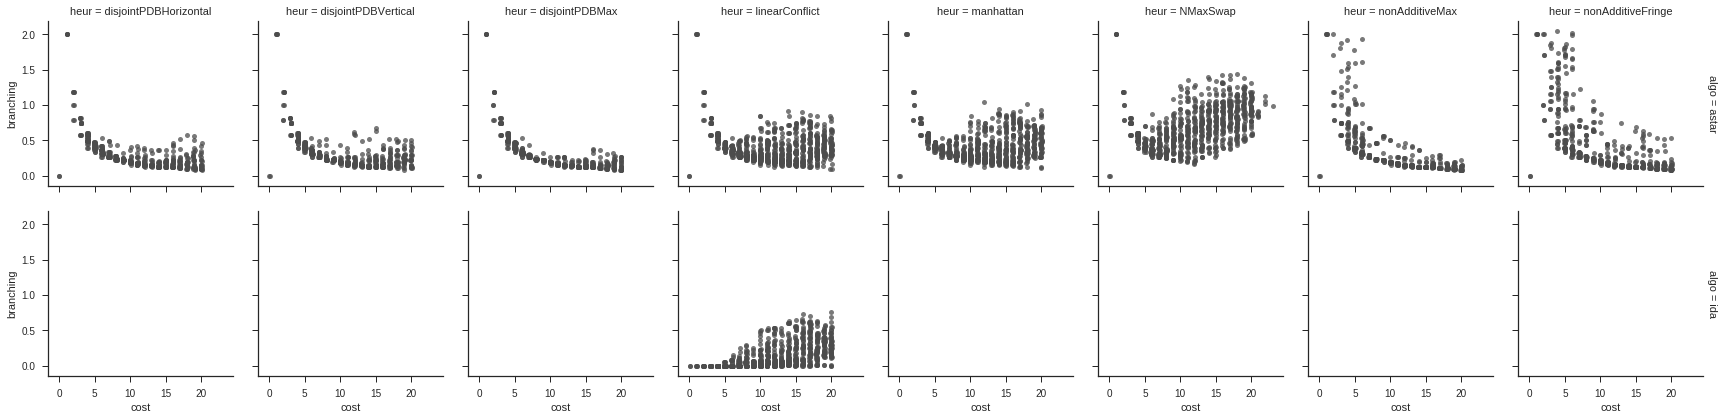

In [17]:
factor_plots_scatter(combined_df, 'algo', 'heur', 'cost', 'branching', scatter_kws={"s": 25})

original


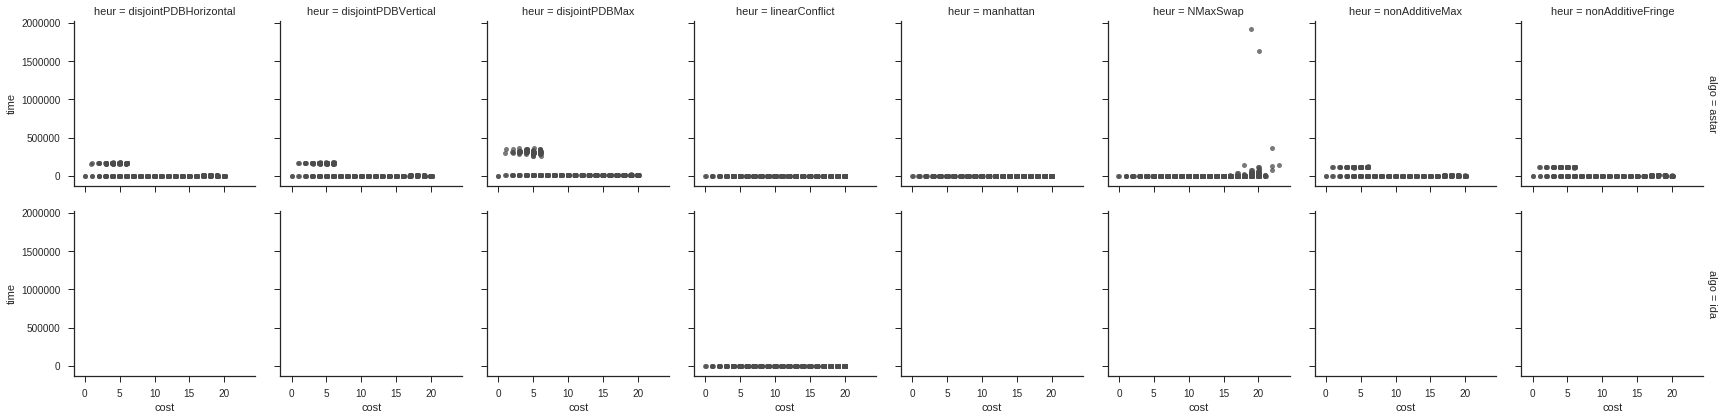

In [18]:
print ("original")
factor_plots_scatter(combined_df, 'algo', 'heur', 'cost', 'time', scatter_kws={"s": 25})

#print ("\nNMax filtered")
#factor_plots_scatter(filt_combined, 'algo', 'heur', 'cost', 'time', scatter_kws={"s": 25})

In [20]:
print ("original")
factor_plots_scatter(combined_df_df, 'algo', 'heur', 'cost', 'expanded', scatter_kws={"s": 25})

#print ("\nNMax filtered")
#factor_plots_scatter(filt_astar, 'algo', 'heur', 'cost', 'expanded', scatter_kws={"s": 25})

original


NameError: name 'combined_df_df' is not defined

cost


/home/user/.anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


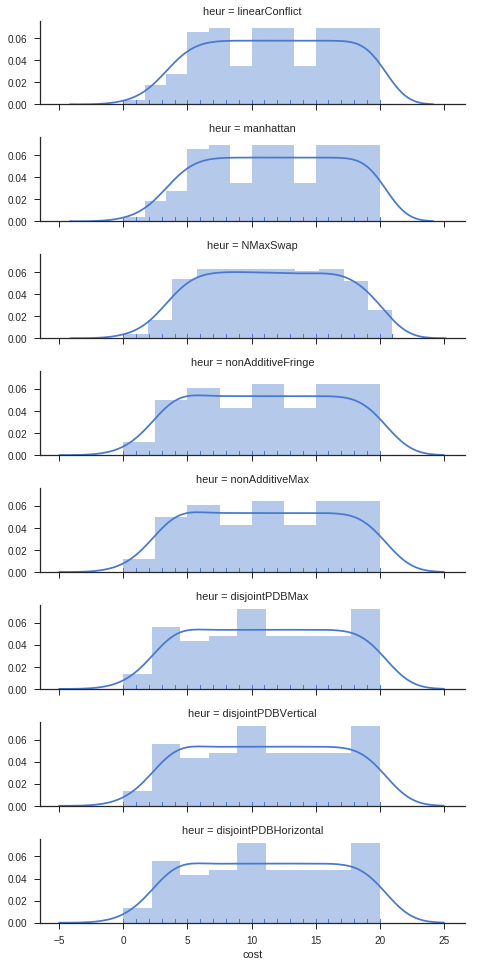

expanded


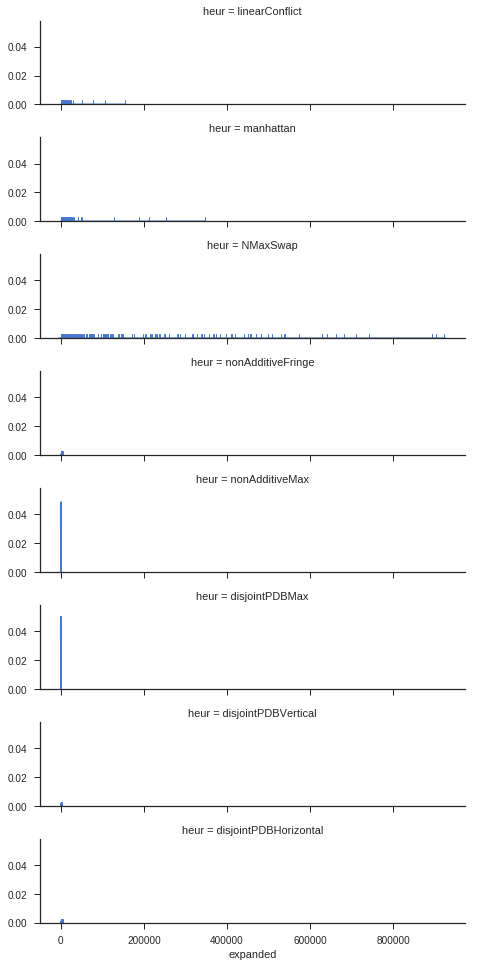

branching


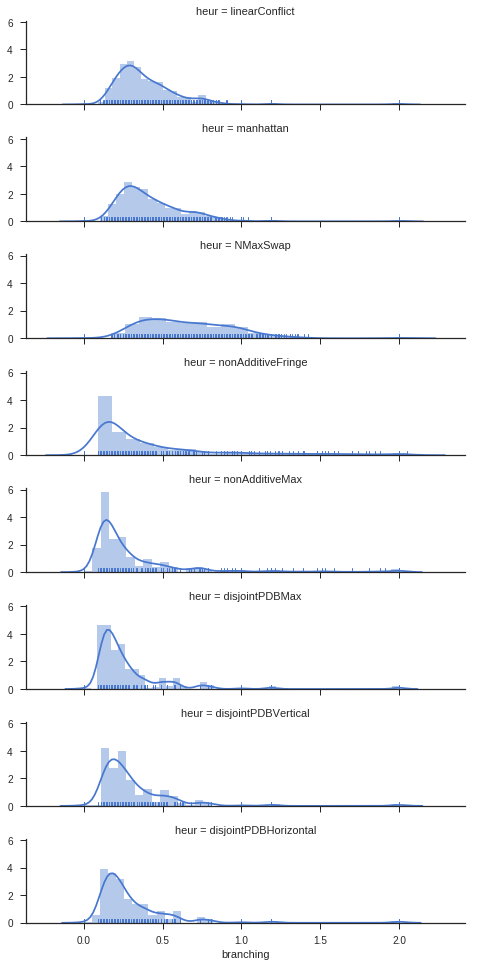

time


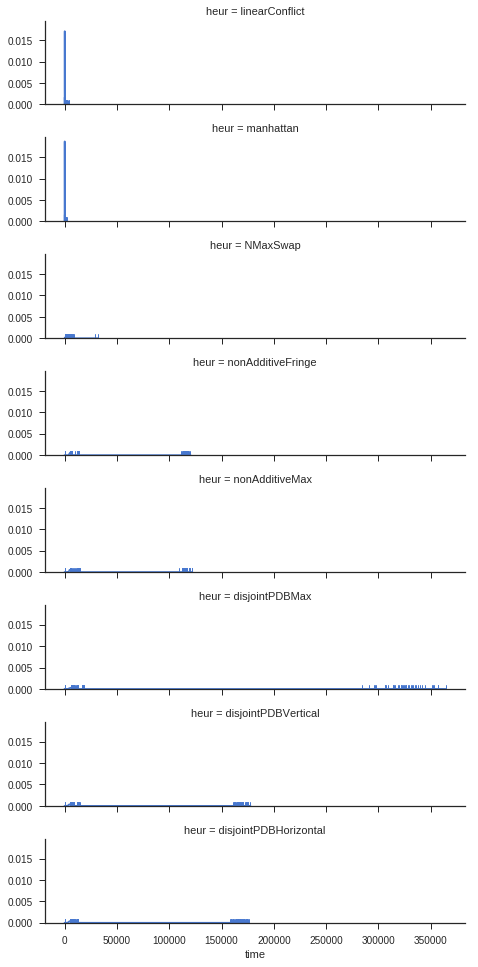

In [46]:
for metric in metrics:
    print (metric)
    dist_plots_vert(filt_combined, 'heur', metric)

In [10]:
results = combined_df
# assign groups
def group_cost(x):
    if (x < 8):
        return 'small'
    elif (x < 16):
        return 'medium'
    else:
        return 'large'
    
results['group'] = results['cost'].map(group_cost)

board_3 = results[(['size'] == '3x3') & (results['algo'] == 'IDA')]


In [13]:
g = sns.FacetGrid(board_3, col="heur", hue="group")
g.map(plt.scatter, "", "tip", alpha=.7)
g.add_legend();

IndexError: index out of range